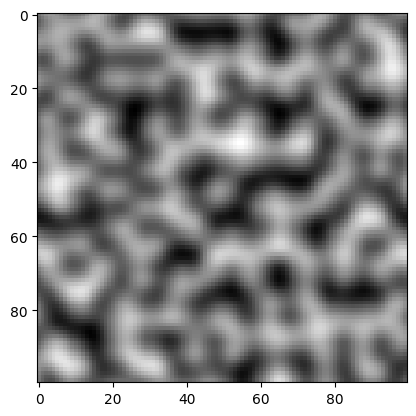

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Gradient vectors for Perlin noise
def generate_gradients(grid_size):
    angles = np.random.rand(grid_size, grid_size) * 2 * np.pi
    return np.stack((np.cos(angles), np.sin(angles)), axis=-1)

# Linear interpolation
def lerp(a, b, t):
    return a + t * (b - a)

# Fade function (smoother interpolation)
def fade(t):
    return t * t * t * (t * (t * 6 - 15) + 10)

# Perlin noise function
def perlin_noise(x, y, gradients):
    x0, y0 = int(x), int(y)
    x1, y1 = x0 + 1, y0 + 1
    
    sx, sy = fade(x - x0), fade(y - y0)

    # Get dot products at four corners
    dot00 = np.dot(gradients[x0 % gradients.shape[0], y0 % gradients.shape[1]], np.array([x - x0, y - y0]))
    dot10 = np.dot(gradients[x1 % gradients.shape[0], y0 % gradients.shape[1]], np.array([x - x1, y - y0]))
    dot01 = np.dot(gradients[x0 % gradients.shape[0], y1 % gradients.shape[1]], np.array([x - x0, y - y1]))
    dot11 = np.dot(gradients[x1 % gradients.shape[0], y1 % gradients.shape[1]], np.array([x - x1, y - y1]))

    # Interpolate
    lerp_x0 = lerp(dot00, dot10, sx)
    lerp_x1 = lerp(dot01, dot11, sx)
    return lerp(lerp_x0, lerp_x1, sy)

# Generate Perlin noise for an entire grid
def generate_perlin_grid(size, gradients, scale=10):
    noise_grid = np.zeros((size, size))
    for i in range(size):
        for j in range(size):
            noise_grid[i, j] = perlin_noise(i / scale, j / scale, gradients)
    return noise_grid

# Animation function
def update(frame):
    global gradients
    gradients = generate_gradients(grid_size)  # Slightly change the gradients over time
    noise_frame = generate_perlin_grid(grid_size, gradients, scale=10)
    im.set_array(noise_frame)
    return [im]

# Initialize animation
grid_size = 100
gradients = generate_gradients(grid_size)
fig, ax = plt.subplots()
im = ax.imshow(generate_perlin_grid(grid_size, gradients, scale=10), cmap='gray', animated=True)

ani = animation.FuncAnimation(fig, update, frames=100, interval=50, blit=False)
plt.show()


In [27]:
import numpy as np
import cv2
import os

# Gradient vectors for Perlin noise
def generate_gradients(grid_size):
    angles = np.random.rand(grid_size, grid_size) * 2 * np.pi
    return np.stack((np.cos(angles), np.sin(angles)), axis=-1)

# Linear interpolation
def lerp(a, b, t):
    return a + t * (b - a)

# Fade function (smoother interpolation)
def fade(t):
    return t * t * t * (t * (t * 6 - 15) + 10)

# Perlin noise function
def perlin_noise(x, y, gradients):
    x0, y0 = int(x), int(y)
    x1, y1 = x0 + 1, y0 + 1
    
    sx, sy = fade(x - x0), fade(y - y0)

    # Get dot products at four corners
    dot00 = np.dot(gradients[x0 % gradients.shape[0], y0 % gradients.shape[1]], np.array([x - x0, y - y0]))
    dot10 = np.dot(gradients[x1 % gradients.shape[0], y0 % gradients.shape[1]], np.array([x - x1, y - y0]))
    dot01 = np.dot(gradients[x0 % gradients.shape[0], y1 % gradients.shape[1]], np.array([x - x0, y - y1]))
    dot11 = np.dot(gradients[x1 % gradients.shape[0], y1 % gradients.shape[1]], np.array([x - x1, y - y1]))

    # Interpolate
    lerp_x0 = lerp(dot00, dot10, sx)
    lerp_x1 = lerp(dot01, dot11, sx)
    return lerp(lerp_x0, lerp_x1, sy)

# Generate Perlin noise for an entire grid
def generate_perlin_grid(size, gradients, scale=10):
    noise_grid = np.zeros((size, size))
    for i in range(size):
        for j in range(size):
            noise_grid[i, j] = perlin_noise(i / scale, j / scale, gradients)
    return noise_grid

# Generate animation frames
grid_size = 100  # Size of Perlin noise grid
num_frames = 100  # Number of frames in the video
scale = 10  # Scaling factor for smooth noise

gradients = generate_gradients(grid_size)
frames = []

for frame in range(num_frames):
    gradients = generate_gradients(grid_size)  # Slightly change the gradients over time
    noise_frame = generate_perlin_grid(grid_size, gradients, scale)
    noise_frame = ((noise_frame - noise_frame.min()) / (noise_frame.max() - noise_frame.min()) * 255).astype(np.uint8)
    frames.append(noise_frame)

# Define the output filename in the same directory as the script
current_directory = os.getcwd()
video_filename = os.path.join(current_directory, "perlin_noise_animation.mp4")

# Write video using OpenCV
fps = 20  # Frames per second
height, width = frames[0].shape

fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec for MP4 format
video_writer = cv2.VideoWriter(video_filename, fourcc, fps, (width, height), isColor=False)

for frame in frames:
    video_writer.write(frame)

video_writer.release()

video_filename


'c:\\Users\\Administrator\\Desktop\\Martin\\website\\MkDocs-Website\\docs\\perlin_noise_animation.mp4'